
@Author : kkutysllb

@E-mail : libing1@sn.chinamobile.com，31468130@qq.com

@Date   : 2024-11-26 10:15

@Desc   : LeNet-5网络手写数字识别


In [54]:

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import MNIST, FashionMNIST
from torchvision import transforms

import os
import sys
sys.path.append('../')
from kk_libraries.kk_functions import  get_device, kk_animator_train_evaluate
from kk_libraries.kk_dataprocess import kk_load_data, kk_predict_gray_labels
from kk_libraries.kk_constants import text_labels_mnist, text_labels_fashion_mnist


In [4]:
# 模型定义

class LeNet_5(nn.Module):
    """LeNet-5网络"""
    def __init__(self, in_channels, num_classes):
        super(LeNet_5, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=6, kernel_size=5, padding=2),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2)
        )
        self.fc1 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=16 * 5 * 5, out_features=120),
            nn.Sigmoid()
        )
        
        self.fc2 = nn.Sequential(
            nn.Linear(in_features=120, out_features=84),
            nn.Sigmoid()
        )
        self.out = nn.Linear(in_features=84, out_features=num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        return x

In [43]:
# 定义数据预处理方法
def kk_data_transform():
    return {
        'train': transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]),
        'valid': transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
        }


In [45]:
# 数据加载
data_path = os.path.join('../', "data/FasionMNIST")
train_loader, valid_loader, test_loader = kk_load_data(data_path, ratio=0.05, batch_size=256, DataSets=FashionMNIST, transform=kk_data_transform())

100.0%


Extracting ../data/FasionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FasionMNIST/FashionMNIST/raw



100.0%


Extracting ../data/FasionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FasionMNIST/FashionMNIST/raw



100.0%


Extracting ../data/FasionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FasionMNIST/FashionMNIST/raw



100.0%

Extracting ../data/FasionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FasionMNIST/FashionMNIST/raw

训练集大小: 57000, 验证集大小: 3000, 测试集大小: 10000


In [56]:
# 模型构建
model = LeNet_5(in_channels=1, num_classes=10)

# 损失函数
criterion = nn.CrossEntropyLoss()

# 优化器
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.99)

# 超参数
epochs = 100
device = get_device()

训练耗时: 0时 5分 59秒, 平均每秒处理样本数: 16726.6 examples/sec, 训练loss: 0.1558, 测试loss: 0.2660 训练acc: 0.9428, 测试acc: 0.9127, 最佳精度: 0.9127, 训练设备: mps最终学习率: 0.01


(LeNet_5(
   (conv1): Sequential(
     (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
     (1): Sigmoid()
     (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
   )
   (conv2): Sequential(
     (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
     (1): Sigmoid()
     (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
   )
   (fc1): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=400, out_features=120, bias=True)
     (2): Sigmoid()
   )
   (fc2): Sequential(
     (0): Linear(in_features=120, out_features=84, bias=True)
     (1): Sigmoid()
   )
   (out): Linear(in_features=84, out_features=10, bias=True)
 ),
 [2.3176709107516107,
  2.307887860214501,
  2.3026465057908445,
  2.244489142702337,
  1.5133927853232936,
  1.02480792664645,
  0.8599770995022957,
  0.7644353432906301,
  0.656077168247156,
  0.5923512466162966,
  0.5461008334243507,
  0.5067002758896142,
  0.4800202008966814,
  0.4638981308518795,
  0.4388013032612

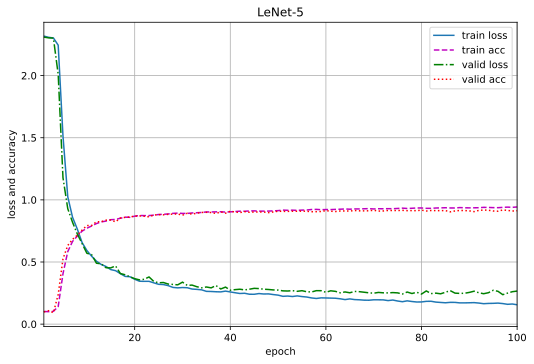

In [57]:
# 训练
kk_animator_train_evaluate(model, train_loader, valid_loader, criterion, optimizer, epochs, device, titles='LeNet-5', model_name='LeNet-5')


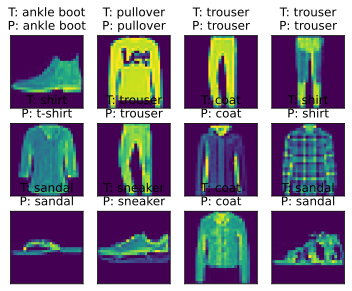

预测精度: 92.58%


In [58]:
 # 测试
kk_predict_gray_labels(model, test_loader, text_labels_fashion_mnist, device)